Mean of y_test: 83184.5
Total Sum of Squares (TSS): 3064775661.5
Residual Sum of Squares (RSS): 317259664.76977366
R^2 Score (Batch Gradient Descent): 0.8964819289205342


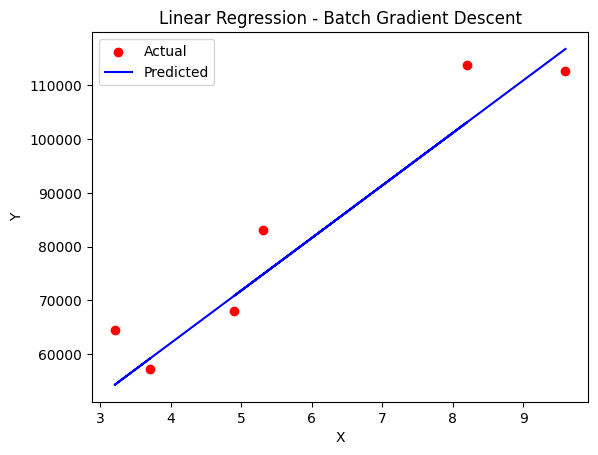

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

class LinearRegressionBatchGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Load dataset
data = pd.read_csv('salary_data.csv')

# Assume last column is the target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model using batch gradient descent
lin_reg_batch_gd = LinearRegressionBatchGD(learning_rate=0.01, iterations=1000)
lin_reg_batch_gd.fit(X_train, y_train)

# Predictions
y_pred_batch_gd = lin_reg_batch_gd.predict(X_test)
# Calculate R^2 score
# Calculate R^2 score
# Step 1: Calculate the mean of the observed target values
y_mean = np.mean(y_test)

# Step 2: Calculate the total sum of squares (TSS)
tss = np.sum((y_test - y_mean) ** 2)

# Step 3: Calculate the residual sum of squares (RSS)
rss_batch_gd = np.sum((y_test - y_pred_batch_gd) ** 2)

# Step 4: Calculate R^2 score using the formula: R^2 = 1 - (RSS / TSS)
r2_batch_gd = 1 - (rss_batch_gd / tss)

# Print all values
print("Mean of y_test:", y_mean)
print("Total Sum of Squares (TSS):", tss)
print("Residual Sum of Squares (RSS):", rss_batch_gd)
print("R^2 Score (Batch Gradient Descent):", r2_batch_gd)

# Visualization
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred_batch_gd, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Batch Gradient Descent')
plt.legend()
plt.show()


Mean of y_test (Stochastic Gradient Descent): 83184.5
Total Sum of Squares (TSS) - Stochastic Gradient Descent: 3064775661.5
Residual Sum of Squares (RSS) - Stochastic Gradient Descent: 260234629.7370854
R^2 Score (Stochastic Gradient Descent): 0.9150885224631031


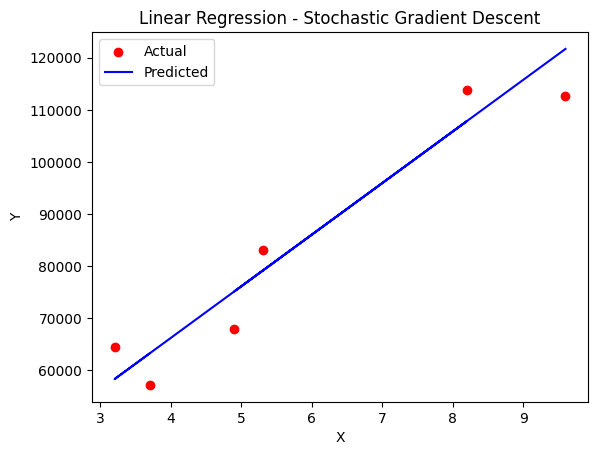

In [3]:
class LinearRegressionStochasticGD:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.iterations):
            for j in range(self.m):
                X_i = X[j, :].reshape(1, -1)
                y_i = y[j]
                y_pred_i = np.dot(X_i, self.weights) + self.bias
                dw = np.dot(X_i.T, (y_pred_i - y_i))
                db = (y_pred_i - y_i)

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Initialize and train linear regression model using stochastic gradient descent
lin_reg_stochastic_gd = LinearRegressionStochasticGD(learning_rate=0.01, iterations=1000)
lin_reg_stochastic_gd.fit(X_train, y_train)

# Predictions
y_pred_stochastic_gd = lin_reg_stochastic_gd.predict(X_test)
# Calculate R^2 score for Stochastic Gradient Descent
# Step 1: Calculate the mean of the observed target values
y_mean = np.mean(y_test)

# Step 2: Calculate the total sum of squares (TSS)
tss = np.sum((y_test - y_mean) ** 2)

# Step 3: Calculate the predicted target values for Stochastic Gradient Descent
y_pred_stochastic_gd = lin_reg_stochastic_gd.predict(X_test)

# Step 4: Calculate the residual sum of squares (RSS) for Stochastic Gradient Descent
rss_stochastic_gd = np.sum((y_test - y_pred_stochastic_gd) ** 2)

# Step 5: Calculate R^2 score for Stochastic Gradient Descent using the formula: R^2 = 1 - (RSS / TSS)
r2_stochastic_gd = 1 - (rss_stochastic_gd / tss)

# Print all values for Stochastic Gradient Descent
print("Mean of y_test (Stochastic Gradient Descent):", y_mean)
print("Total Sum of Squares (TSS) - Stochastic Gradient Descent:", tss)
print("Residual Sum of Squares (RSS) - Stochastic Gradient Descent:", rss_stochastic_gd)
print("R^2 Score (Stochastic Gradient Descent):", r2_stochastic_gd)

# Visualization for Stochastic Gradient Descent
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.plot(X_test, y_pred_stochastic_gd, color='blue', label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression - Stochastic Gradient Descent')
plt.legend()
plt.show()
